**Q-Learning Algorithm**

In this example we will use the Q-learning to train an agent to navigate a popular environment from Open AI Gym. https://www.gymlibrary.dev/index.html

*Frozen Lake Environment*
The goal of the agent is to navigate a frozen lake and find the goal without falling through the ice.

The formula for updating the Q-Table after each action is as follows:

***Q[state,action] = Q[state,action] + α ∗ (reward + γ ∗ max(Q[newState,:]) − Q[state,action])*** 

α  stands for the Learning Rate

γ  stands for the Discount Factor (GAMMA)

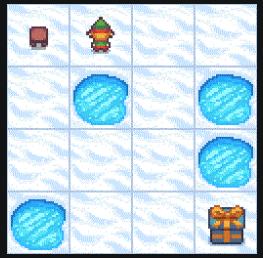

In [40]:
import gymnasium as gym
import numpy as np
import time

In [49]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False)
STATES = env.observation_space.n
ACTIONS = env.action_space.n

In [50]:
Q = np.zeros((STATES, ACTIONS))  # create a matrix with all 0 values 
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [63]:
# CONSTANTS 
EPISODES = 1000     # how many times to run the environment from the beginning
MAX_STEPS = 100     # max number of steps allowed for each run

LEARNING_RATE = 0.81    # The learning rate is a numeric constant that defines how much change is permitted on each QTable update.
GAMMA = 0.96            # gamma is used to balance how much focus is put on the current and future reward.
EPSILON = 0.9 # start with a 90% chace of picking a random action

RENDER = True # if you want to see training

In [64]:
rewards = []
for episode in range(EPISODES):
    
    state, info = env.reset()
    for _ in range(MAX_STEPS):
        
        if RENDER:
            env.render()
        
        # picking an action
        if np.random.uniform(0, 1) < EPSILON:
            action = env.action_space.sample() # take a random action
        else: 
            action = np.argmax(Q[state, :]) # use Q table to pick the best action based on current values
        
        next_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        
        Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])
        
        state = next_state
        
        if done:
            rewards.append(reward)
            EPSILON -= 0.001
            break # reached the goal

print(Q)
print(f"Total rewards: {sum(rewards)}")
print(f"Average reward: {sum(rewards)/len(rewards)}")

[[0.78275779 0.8153727  0.8153727  0.78275779]
 [0.78275779 0.         0.84934656 0.8153727 ]
 [0.8153727  0.884736   0.8153727  0.84934656]
 [0.84934656 0.         0.8153727  0.8153727 ]
 [0.8153727  0.84934656 0.         0.78275779]
 [0.         0.         0.         0.        ]
 [0.         0.9216     0.         0.84934656]
 [0.         0.         0.         0.        ]
 [0.84934656 0.         0.884736   0.8153727 ]
 [0.84934656 0.9216     0.9216     0.        ]
 [0.884736   0.96       0.         0.884736  ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.9216     0.96       0.884736  ]
 [0.9216     0.96       1.         0.9216    ]
 [0.         0.         0.         0.        ]]
Total rewards: 553.0
Average reward: 0.553


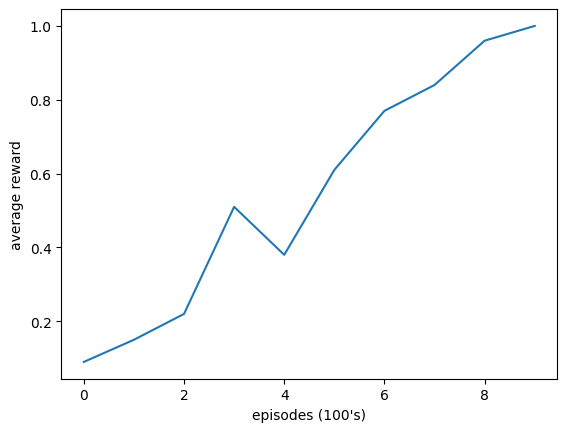

In [ ]:
# PLOTING THE PROGRESS

import matplotlib.pyplot as plt

def get_average(values)
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100])) 

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()